In [1]:
# Importing standard Qiskit libraries
from qiskit import *
from qiskit.visualization import *
from  qiskit.providers.ibmq.ibmqbackend import IBMQSimulator
from qiskit.tools.monitor import job_monitor

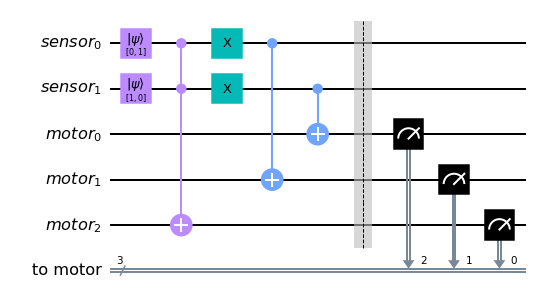

In [2]:
# Making the Qiskit Classes:
sensors = QuantumRegister(2, 'sensor')  # making the sensor registers
motors = QuantumRegister(3, 'motor')  # making the motor registers
creg_c = ClassicalRegister(3, 'to motor')  # making the classical register for the motors
circuit = QuantumCircuit(sensors, motors, creg_c)

# Initializing the Circuit:
ket_0 = [1, 0]
ket_1 = [0, 1]
# Demonstrating initialization with sensor value as = |10>  
# Feel free to try with other 3 states (|00>, |01> and |11>) too.
# This is Similar to the digitalRead function of Arduino
# quantumRead = [ket_0, ket_0] # |00>
# quantumRead = [ket_0, ket_1] # |01>
quantumRead = [ket_1, ket_0]   # |10>
# quantumRead = [ket_1, ket_1] # |11>

circuit.initialize(quantumRead[0], [sensors[0]])
circuit.initialize(quantumRead[1], [sensors[1]])

# Designing the circuit
circuit.ccx(sensors[0], sensors[1], motors[2])
circuit.x(sensors[0])
circuit.x(sensors[1])
circuit.cx(sensors[0], motors[1])
circuit.cx(sensors[1], motors[0])
circuit.barrier()
circuit.measure(motors[0], creg_c[2])
circuit.measure(motors[1], creg_c[1])
circuit.measure(motors[2], creg_c[0])
circuit.draw(output = 'mpl')

## Running the Quantum circuit on the Quantum Simulator

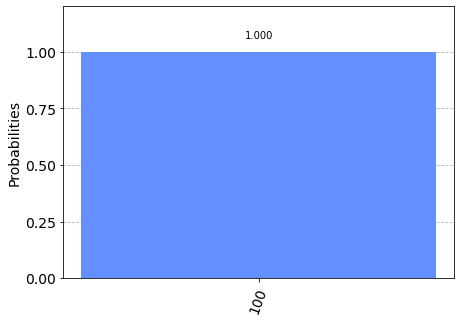

In [3]:
# Running the Quantum circuit on the Quantum Simulator
comp = Aer.get_backend("qasm_simulator")
results = execute(circuit, comp).result()
plot_histogram(results.get_counts(circuit))

## Running on a Quantum Computer

In [ ]:
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
IBMQ.load_account()

In [5]:
provider = IBMQ.get_provider('ibm-q')
quantum_backends = [x for x in provider.backends() if not isinstance(x, IBMQSimulator)]
q_comp = least_busy(quantum_backends)
print(f"running on '{q_comp.name()}'")

running on 'ibmq_lima'


Job Status: job has successfully run


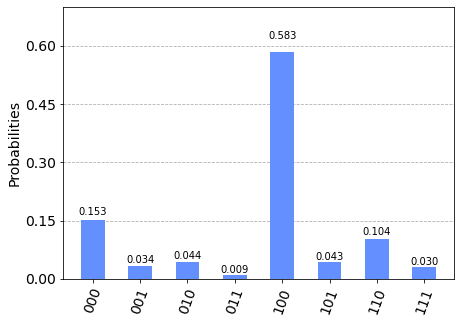

In [6]:
job = execute(circuit, q_comp)
job_monitor(job)
plot_histogram(job.result().get_counts(circuit))